In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
#Given Specification
fstop_L,fpass_L,fstop_U,fpass_U,fs=map(int,input().split())   #Lower stopband frequency in Hz,#Lower passband frequency in HZ,Upper stopband frequency in Hz,Upper passband frequency in HZ,Sampling frequency in Hz

800 1500 3000 2500 8000


In [5]:
#Calculations
del_f1=abs(fpass_L-fstop_L)/fs       #Normalized lower transition band w.r.t. fs
del_f2=abs(fstop_U-fpass_U)/fs       #Normalized upper transition band w.r.t. fs

N1=3.3/del_f1         #Filter length using selected window based on Normalized lower transition band
N2=3.3/del_f2          #Filter length using selected window based on Normalized upper transition band
print('Filter length based on lower transition band:', N1)
print('Filter length based on upper transition band:', N2)
##Select length as the maximum of the N1 and N2 and if it is even, make it next higher integer
N=int(np.ceil(max(N1,N2)))
if(N%2==0):
  N=N+1
print('Selected filter length :', N)


Filter length based on lower transition band: 37.714285714285715
Filter length based on upper transition band: 52.8
Selected filter length : 53


In [6]:
##Calculate lower and uper cut-off frequencies
fL=(fstop_L+fpass_L)/2              #Lower cut-off frequency in Hz
fU=(fstop_U+fpass_U)/2              #Upper cut-off frequency in Hz
wL=fL/(fs/2)                        #Normalized Lower cut-off frequency w.r.t. Nyquist rate       
wU=fU/(fs/2)                        #Normalized upper cut-off frequency w.r.t. Nyquist rate 
cutoff=np.array([wL,wU])           #Cutoff frequency array containing lower and upper cut-off

In [7]:
##Determine Filter coefficients of band pass filter
b_ham =signal.firwin(N,cutoff,window="hamming",pass_zero="bandpass")       #Call filter design function using required window

##Determine Frequency response of the filters
w,h_ham =signal.freqz(b_ham,a=1)      #Calculate response h at specified frequency points w for Haming window

#Calculate Magnitude in dB
h_dB_ham =20*np.log10(abs(h_ham))     #Calculate magnitude in decibels 

#Calculate phase in degree
h_Phase_ham =np.unwrap(np.arctan2(np.imag(h_ham),np.real(h_ham)))   #Calculate phase 

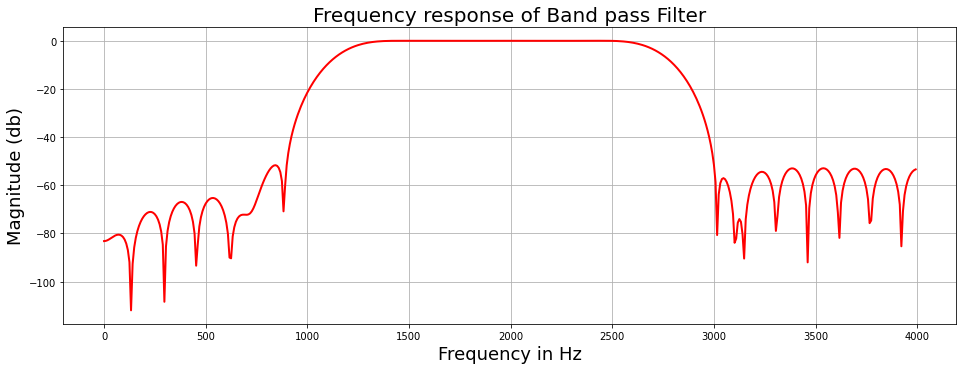

In [10]:
fig = plt.figure(figsize=(16, 12))
##Magnitude response Plot
sub1 = plt.subplot(2, 1, 1)
sub1.plot(w*fs/(2*np.pi),h_dB_ham,'r', label='Hamming', linewidth='2')           #Digital frequency w converted in analog frequency
sub1.set_ylabel('Magnitude (db)', fontsize=18)
sub1.set_xlabel('Frequency in Hz', fontsize=18)
sub1.set_title('Frequency response of Band pass Filter', fontsize=20)
sub1.axis=([0,  fs/2,  -110,  5])
sub1.grid()

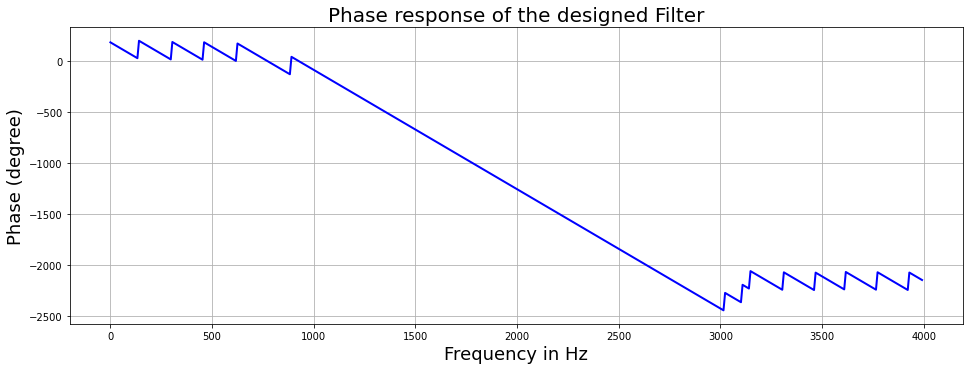

In [11]:
fig = plt.figure(figsize=(16, 12))
sub2 = plt.subplot(2, 1, 2)
sub2.plot(w*fs/(2*np.pi),h_Phase_ham*180/np.pi, 'b', label='Haming', linewidth='2')   #Digital frequency w converted in analog frequency and phase in degree
sub2.set_ylabel('Phase (degree)', fontsize=18)
sub2.set_xlabel('Frequency in Hz', fontsize=18)
sub2.set_title('Phase response of the designed Filter', fontsize=20)
sub2.grid()
